In [99]:
import pandas as pd
import argparse
import joblib
from preprocessor import preprocessing_func
from prediction import predict_harness
import re 
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

In [100]:
model_type='XGboost'
def extract_encoded_feature_names(features):
    '''
    Extract the unique underlying features if there 
    are Onehot encoded features (ie XGBoost) 
    '''
    unencoded_features = set()
    regex = r'(_\d+)$'
    for feature in features:
        unencoded_feature = re.sub(regex, '', feature)
        unencoded_features.add(unencoded_feature)
    
    return list(unencoded_features)

# Load the model and test data
model_file = 'models/xgb_model.sav'
model = joblib.load(model_file)
encoded_features = model.feature_names_in_
test = pd.read_csv('/Users/chitvangoyal/Desktop/3001_project/3001-ML-Finance-Project/train.csv')
features = extract_encoded_feature_names(encoded_features)
one_hot_encode = True

preproc_params = {
    "statement_offset" : 6,
    "ir_path": "csv_files/ECB Data Portal_20231029154614.csv",
    "features": features,
    "categorical_mapping_path":{
        'ateco_industry': 'csv_files/ateco_industry_mapping.csv',
        #'legal_struct': 'csv_files/legal_struct_mapping.csv'
    }
}


print(features)
test = pd.read_csv('/Users/chitvangoyal/Desktop/3001_project/3001-ML-Finance-Project/train.csv')
print(len(test))
test = preprocessing_func(test, preproc_params, label=True, interest_rates=True, 
                        one_hot_encode=one_hot_encode) # When selecting XGboost need to set `one_hot_encode` to True
print(len(test))
predictions = predict_harness(test, model, model_type, plot_auc=False)
print(len(predictions))

pd.DataFrame({
            "PD":list(predictions)
            }).to_csv('pred.csv', index=False)
pred = pd.DataFrame({
            "PD":list(predictions)
            })

print(pred[pred['PD'].isna()])

['debt_to_ebitda', 'asset_turnover', 'roa', 'cfo_to_debt', 'leverage_ratio', 'interest_rate', 'debt_to_equity', 'defensive_interval']
1023552
1023552
1023552
Empty DataFrame
Columns: [PD]
Index: []


In [101]:
y_label = test['Default']
test = test.drop('Default', axis=1)

[13:18:29] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


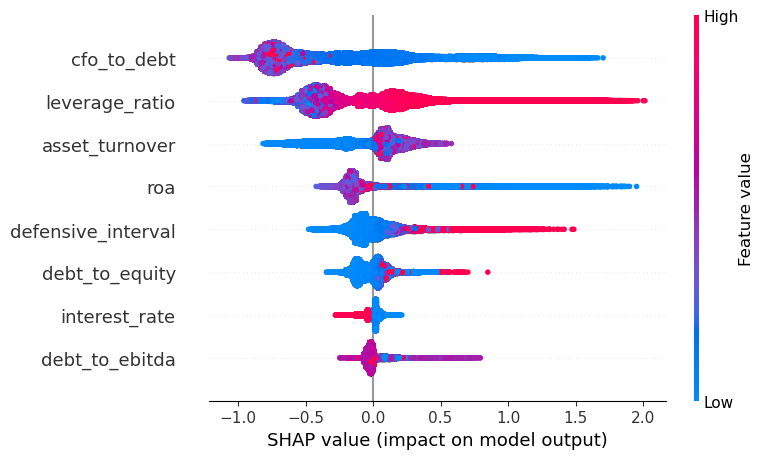

In [102]:

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)  # Assuming your model is tree-based (XGBoost, Random Forest)
shap_values = explainer.shap_values(test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, test)

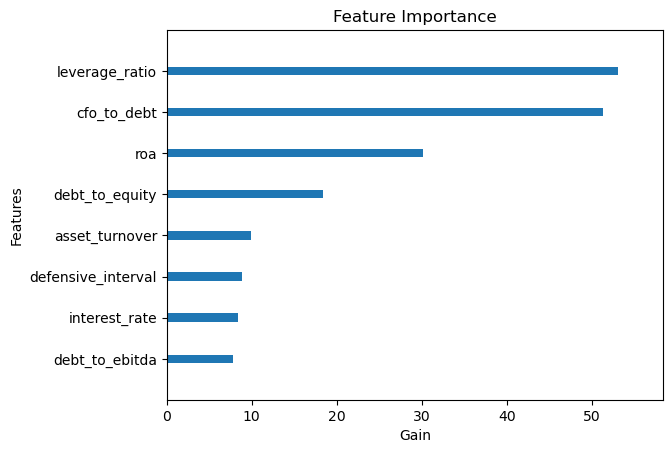

In [32]:

# Plot feature importance
xgb.plot_importance(model, importance_type='gain', title='Feature Importance', xlabel='Gain', ylabel='Features', grid=False, show_values=False)
plt.show()


In [103]:
shap.initjs()
# Choose a specific prediction (replace index with the one you want to explain)
sample_idx = 14
shap.force_plot(explainer.expected_value, shap_values[sample_idx, :], test.iloc[sample_idx, :])


In [43]:
shap.initjs()
# Choose a specific prediction (replace index with the one you want to explain)
sample_idx = 10
shap.force_plot(explainer.expected_value, shap_values[sample_idx, :], test.iloc[sample_idx, :])


In [44]:
shap.initjs()
# Choose a specific prediction (replace index with the one you want to explain)
sample_idx = 20
shap.force_plot(explainer.expected_value, shap_values[sample_idx, :], test.iloc[sample_idx, :])

In [45]:
shap.initjs()
# Choose a specific prediction (replace index with the one you want to explain)
sample_idx = 100
shap.force_plot(explainer.expected_value, shap_values[sample_idx, :], test.iloc[sample_idx, :])

In [6]:
import seaborn as sns
import numpy as np

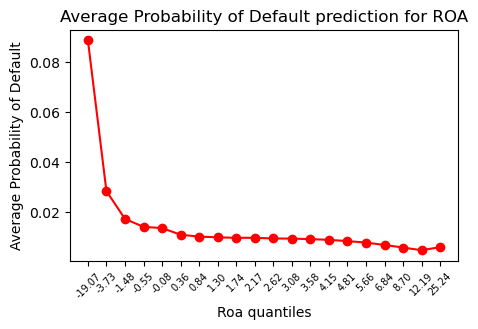

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming test contains the 'roa' column
df_copy = test.copy()

# Add a new column for predictions
df_copy['predicted_proba'] = pd.DataFrame(predictions)

# Specify the number of bins you want
num_bins = 20

# Use cut to create bins with equal observations
df_copy['roa_bins'] = pd.qcut(df_copy['roa'], q=num_bins, labels=False, duplicates='drop')

# Group by the bins of the 'roa' variable and calculate the mean for each bin
grouped_data = (
    df_copy.groupby(['roa_bins'])['predicted_proba']
    .mean()
    .reset_index(name='predicted_proba')
)

# Fill NaN values with 0
grouped_data['predicted_proba'].fillna(0, inplace=True)

# Plotting
plt.figure(figsize=(5, 3))

plt.plot(grouped_data['roa_bins'], grouped_data['predicted_proba'], marker='o', color='red')

# Modify x-axis ticks to display the mean of each bin range
bin_ranges = pd.qcut(df_copy['roa'], q=num_bins, labels=False, duplicates='drop', retbins=True)[1]
bin_means = [df_copy['roa'][(df_copy['roa_bins'] == i)].mean() for i in range(num_bins)]
plt.xticks(range(num_bins), [f'{mean:.2f}' for mean in bin_means], fontsize=7)

plt.title('Average Probability of Default prediction for ROA')
plt.xlabel('Roa quantiles')
plt.ylabel('Average Probability of Default')
plt.xticks(rotation=45)
plt.show()


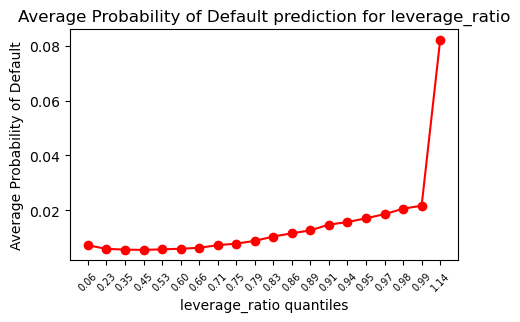

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming test contains the 'roa' column
df_copy = test.copy()

# Add a new column for predictions
df_copy['predicted_proba'] = pd.DataFrame(predictions)

# Specify the number of bins you want
num_bins = 20

# Use cut to create bins with equal observations
df_copy['roa_bins'] = pd.qcut(df_copy['leverage_ratio'], q=num_bins, labels=False, duplicates='drop')

# Group by the bins of the 'roa' variable and calculate the mean for each bin
grouped_data = (
    df_copy.groupby(['roa_bins'])['predicted_proba']
    .mean()
    .reset_index(name='predicted_proba')
)

# Fill NaN values with 0
grouped_data['predicted_proba'].fillna(0, inplace=True)

# Plotting
plt.figure(figsize=(5, 3))

plt.plot(grouped_data['roa_bins'], grouped_data['predicted_proba'], marker='o', color='red')

# Modify x-axis ticks to display the mean of each bin range
bin_ranges = pd.qcut(df_copy['leverage_ratio'], q=num_bins, labels=False, duplicates='drop', retbins=True)[1]
bin_means = [df_copy['leverage_ratio'][(df_copy['roa_bins'] == i)].mean() for i in range(num_bins)]
plt.xticks(range(num_bins), [f'{mean:.2f}' for mean in bin_means], fontsize=7)

plt.title('Average Probability of Default prediction for leverage_ratio')
plt.xlabel('leverage_ratio quantiles')
plt.ylabel('Average Probability of Default')
plt.xticks(rotation=45)
plt.show()


In [54]:
df_copy


,roa,defensive_interval,asset_turnover,debt_to_equity,debt_to_ebitda,cfo_to_debt,leverage_ratio,interest_rate,roa_bins,predicted_proba,defensive_interval_bins,asset_turnover_bins,debt_to_equity_bins,debt_to_ebitda_bins,cfo_to_debt_bins,leverage_ratio_bins,interest_rate_bins
0,1.68,372.241213,0.579218,1.704828,12.531773,0.050775,0.677433,4.0,8.0,0.003687,14.0,10.0,7.0,11.0,12.0,6.0,1
1,2.20,513.795551,0.498018,1.667447,15.776877,0.023760,0.688679,4.0,9.0,0.008633,15.0,9.0,7.0,13.0,8.0,7.0,1
2,-0.34,5701.288031,0.000004,6005.674157,-312.393337,-0.003233,0.999834,4.0,3.0,0.011880,19.0,0.0,19.0,0.0,3.0,19.0,1
3,11.59,165.512707,1.337479,32.215248,6.076789,0.027883,0.976057,4.0,18.0,0.017221,7.0,16.0,17.0,7.0,9.0,16.0,1
4,4.12,154.838078,0.789723,3.145732,6.558099,0.110584,0.789485,4.0,13.0,0.003535,7.0,11.0,9.0,7.0,15.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023547,2.66,316.563315,0.597423,20.988180,32.043746,0.010295,0.954594,1.0,10.0,0.033576,13.0,10.0,16.0,16.0,6.0,15.0,0
1023548,18.47,40.845683,0.982108,2.367738,3.758320,0.159992,0.703941,1.0,19.0,0.004727,1.0,13.0,8.0,5.0,16.0,7.0,0
1023549,-0.06,232.559725,0.017586,27.524529,-1495.124432,0.000029,0.964942,1.0,4.0,0.012419,11.0,1.0,17.0,0.0,4.0,16.0,0
1023550,-0.01,150.772739,0.164410,-82.626696,-16641.901786,-0.000342,1.012251,1.0,4.0,0.017991,6.0,6.0,0.0,0.0,4.0,19.0,0


In [63]:
df_copy.columns

Index(['roa', 'defensive_interval', 'asset_turnover', 'debt_to_equity',
       'debt_to_ebitda', 'cfo_to_debt', 'leverage_ratio', 'interest_rate',
       'roa_bins', 'predicted_proba', 'defensive_interval_bins',
       'asset_turnover_bins', 'debt_to_equity_bins', 'debt_to_ebitda_bins',
       'cfo_to_debt_bins', 'leverage_ratio_bins', 'interest_rate_bins'],
      dtype='object')

In [104]:
len(test)

1023552